# Unsupervised Learning in R

> clustering and dimensionality reduction in R from a machine learning perspective

- author: Victor Omondi
- toc: true
- comments: true
- categories: [unsupervised-learning, machine-learning, r]
- image: images/ield.png

# Overview

Many times in machine learning, the goal is to find patterns in data without trying to make predictions. This is called unsupervised learning. One common use case of unsupervised learning is grouping consumers based on demographics and purchasing history to deploy targeted marketing campaigns. Another example is wanting to describe the unmeasured factors that most influence crime differences between cities. We will cover basic introduction to clustering and dimensionality reduction in R from a machine learning perspective, so that we can get from data to insights as quickly as possible.


# Libraries

In [1]:
library(readr)
library(ggplot2)
library(dplyr)

Warning message:
"package 'readr' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



# Unsupervised learning in R

The k-means algorithm is one common approach to clustering. We will explore how the algorithm works under the hood, implement k-means clustering in R, visualize and interpret the results, and select the number of clusters when it's not known ahead of time. We'll have applied k-means clustering to a fun "real-world" dataset!

### Types of machine learning
- Unsupervised learning
  - Finding structure in unlabeled data
- Supervised learning
  - Making predictions based on labeled data
  - Predictions like regression or classication
- Reinforcement learning

### Unsupervised learning - clustering
- Finding homogeneous subgroups within larger group 
- _People have features such as income, education attainment, and gender_


### Unsupervised learning - dimensionality reduction
- Finding homogeneous subgroups within larger group
  - Clustering
- Finding patterns in the features of the data
  - Dimensionality reduction
    - Find patterns in the features of the data
    - Visualization of high dimensional data
    - Pre-processing before supervised learning


### Challenges and benefits
- No single goal of analysis
- Requires more creativity
- Much more unlabeled data available than cleanly labeled data


## Introduction to k-means clustering

### k-means clustering algorithm
- Breaks observations into pre-dened number of clusters

### k-means in R

- One observation per row, one feature per column
- k-means has a random component
- Run algorithm multiple times to improve odds of the best model


In [2]:
x <- as.matrix(x_df <- read_csv("datasets/x.csv"))
class(x)

Parsed with column specification:
cols(
  V1 = col_double(),
  V2 = col_double()
)


[1] "matrix"

In [3]:
head(x)

V1,V2
3.370958,1.995379
1.435302,2.760242
2.363128,2.038991
2.632863,2.735072
2.404268,1.853527
1.893875,1.942113


### k-means clustering

We have created some two-dimensional data and stored it in a variable called `x`.

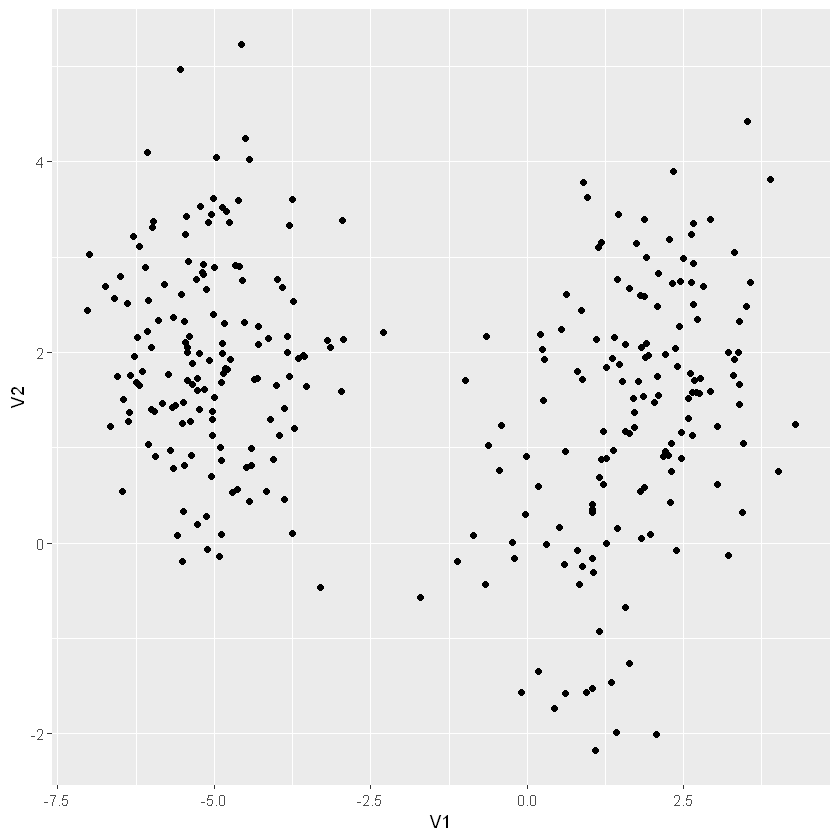

In [4]:
x_df %>%
    ggplot(aes(x=V1, y=V2)) +
    geom_point()

The scatter plot on the above is a visual representation of the data.

We will create a k-means model of the `x` data using 3 clusters, then to look at the structure of the resulting model using the `summary()` function.

In [6]:
# Create the k-means model: km.out
km.out_x <- kmeans(x, centers=3, nstart=20)

# Inspect the result
summary(km.out_x)

             Length Class  Mode   
cluster      300    -none- numeric
centers        6    -none- numeric
totss          1    -none- numeric
withinss       3    -none- numeric
tot.withinss   1    -none- numeric
betweenss      1    -none- numeric
size           3    -none- numeric
iter           1    -none- numeric
ifault         1    -none- numeric

### Results of kmeans()

The `kmeans()` function produces several outputs. One is the output of modeling, the cluster membership. We will access the `cluster` component directly. This is useful anytime we need the cluster membership for each observation of the data used to build the clustering model. This cluster membership might be used to help communicate the results of k-means modeling.

`k-means` models also have a print method to give a human friendly output of basic modeling results. This is available by using `print()` or simply typing the name of the model.

In [8]:
# Print the cluster membership component of the model
km.out_x$cluster



[1] 3 3 3 3 3 3 3 3 3 3 3 3 2 3 3 3 3 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2
 [38] 2 2 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2
 [75] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 1 1 1 1 1 1 1 1 1
[112] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[149] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[186] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[223] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 3 2 2 2 2
[260] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 2 2 3 2 2 2 2 2 2 3 2 2 2 2 2 2 3 2 2
[297] 2 3 2 2

In [9]:
# Print the km.out object
km.out_x

K-means clustering with 3 clusters of sizes 150, 52, 98

Cluster means:
          V1          V2
1 -5.0556758  1.96991743
2  0.6642455 -0.09132968
3  2.2171113  2.05110690

Clustering vector:
  [1] 3 3 3 3 3 3 3 3 3 3 3 3 2 3 3 3 3 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2
 [38] 2 2 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2
 [75] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 1 1 1 1 1 1 1 1 1
[112] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[149] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[186] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[223] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 3 2 2 2 2
[260] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 2 2 3 2 2 2 2 2 2 3 2 2 2 2 2 2 3 2 2
[297] 2 3 2 2

Within cluster sum of squares by cluster:
[1] 295.16925  95.50625 148.64781
 (between_SS / total_SS =  87.2 %)

Available components:

[1] "cluster"     

### Visualizing and interpreting results of kmeans()

One of the more intuitive ways to interpret the results of k-means models is by plotting the data as a scatter plot and using color to label the samples' cluster membership. We will use the standard `plot()` function to accomplish this.

To create a scatter plot, we can pass data with two features (i.e. columns) to `plot()` with an extra argument `col = km.out$cluster`, which sets the color of each point in the scatter plot according to its cluster membership.

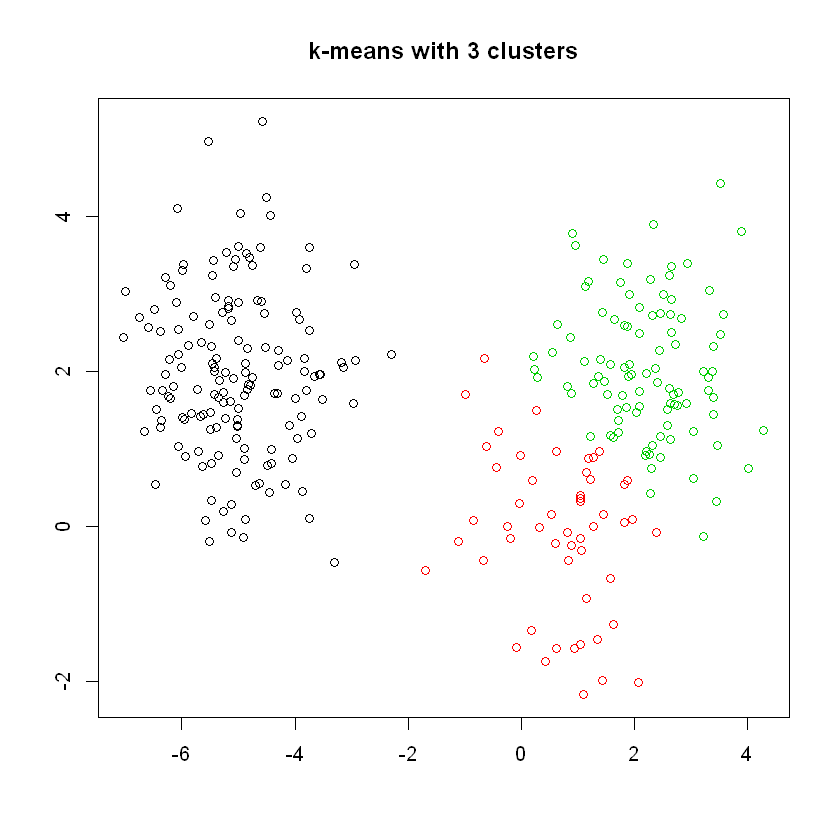

In [11]:
# Scatter plot of x
plot(x, main="k-means with 3 clusters", col=km.out_x$cluster, xlab="", ylab="")

## How k-means works and practical matters

### Objectives
- Explain how k-means algorithm is implemented visually
- **Model selection**: determining number of clusters

### Model selection
- Recall k-means has a random component
- Best outcome is based on total within cluster sum of squares:
  - For each cluster
    - For each observation in the cluster
      - Determine squared distance from observation to cluster center
    - Sum all of them together
- Running algorithm multiple times helps find the global minimum total within cluster sum of squares

### Handling random algorithms

`kmeans()` randomly initializes the centers of clusters. This random initialization can result in assigning observations to different cluster labels. Also, the random initialization can result in finding different local minima for the k-means algorithm. we will demonstrate both results.

At the top of each plot, the measure of model quality—total within cluster sum of squares error—will be plotted. Look for the model(s) with the lowest error to find models with the better model results.

Because `kmeans()` initializes observations to random clusters, it is important to set the random number generator seed for reproducibility.

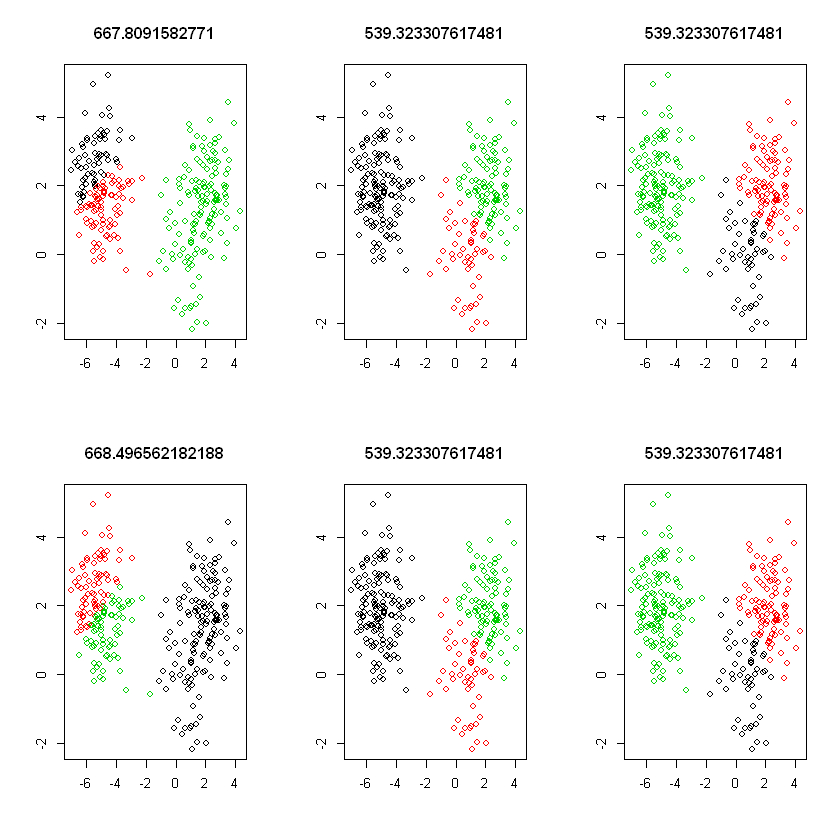

In [12]:
# Set up 2 x 3 plotting grid
par(mfrow = c(2, 3))

# Set seed
set.seed(1)

for(i in 1:6) {
  # Run kmeans() on x with three clusters and one start
  km.out <- kmeans(x, centers=3, nstart=1)
  
  # Plot clusters
  plot(x, col = km.out$cluster, 
       main = km.out$tot.withinss, 
       xlab = "", ylab = "")
}

Because of the random initialization of the k-means algorithm, there's quite some variation in cluster assignments among the six models.

### Selecting number of clusters

The k-means algorithm assumes the number of clusters as part of the input. If you know the number of clusters in advance (e.g. due to certain business constraints) this makes setting the number of clusters easy. However, if you do not know the number of clusters and need to determine it, you will need to run the algorithm multiple times, each time with a different number of clusters. From this, we can observe how a measure of model quality changes with the number of clusters.

We will run `kmeans()` multiple times to see how model quality changes as the number of clusters changes. Plots displaying this information help to determine the number of clusters and are often referred to as scree plots.

The ideal plot will have an elbow where the quality measure improves more slowly as the number of clusters increases. This indicates that the quality of the model is no longer improving substantially as the model complexity (i.e. number of clusters) increases. In other words, the elbow indicates the number of clusters inherent in the data.

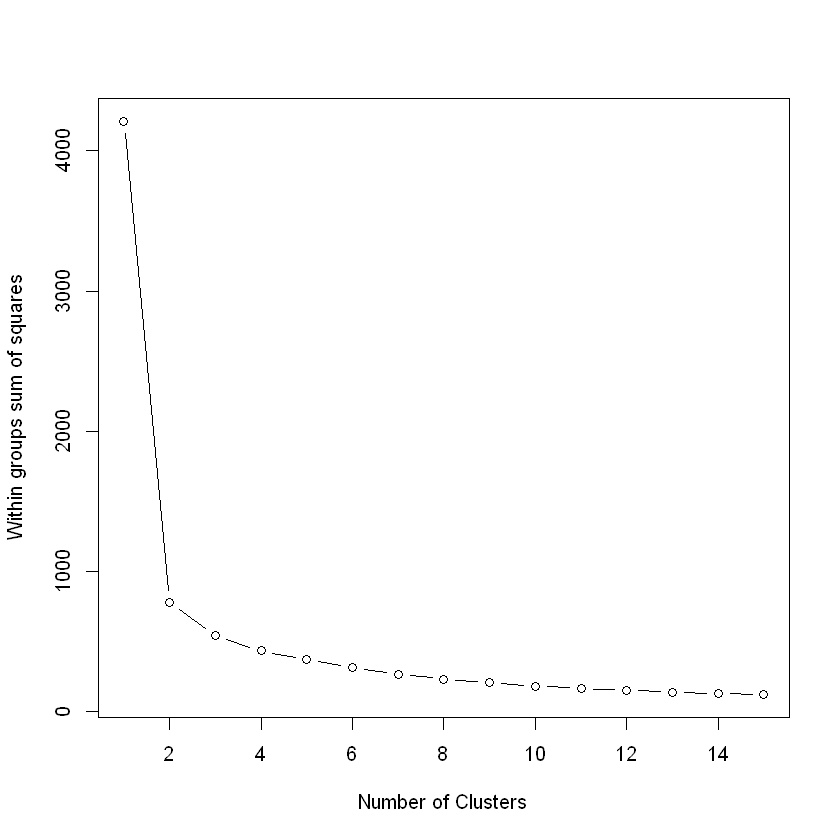

In [13]:
# Initialize total within sum of squares error: wss
wss <- 0

# For 1 to 15 cluster centers
for (i in 1:15) {
  km.out <- kmeans(x, centers = i, nstart=20)
  # Save total within sum of squares to wss variable
  wss[i] <- km.out$tot.withinss
}

# Plot total within sum of squares vs. number of clusters
plot(1:15, wss, type = "b", 
     xlab = "Number of Clusters", 
     ylab = "Within groups sum of squares")



In [14]:
# Set k equal to the number of clusters corresponding to the elbow location
k <- 2

Looking at the scree plot, it looks like there are inherently 2 or 3 clusters in the data.

## Introduction to the Pokemon data


In [15]:
pokemon <- read_csv("datasets//Pokemon.csv")
head(pokemon)

Parsed with column specification:
cols(
  Number = col_double(),
  Name = col_character(),
  Type1 = col_character(),
  Type2 = col_character(),
  Total = col_double(),
  HitPoints = col_double(),
  Attack = col_double(),
  Defense = col_double(),
  SpecialAttack = col_double(),
  SpecialDefense = col_double(),
  Speed = col_double(),
  Generation = col_double(),
  Legendary = col_logical()
)


Number,Name,Type1,Type2,Total,HitPoints,Attack,Defense,SpecialAttack,SpecialDefense,Speed,Generation,Legendary
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,FALSE
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,FALSE
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,FALSE
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,FALSE
4,Charmander,Fire,NA,309,39,52,43,60,50,65,1,FALSE
5,Charmeleon,Fire,NA,405,58,64,58,80,65,80,1,FALSE


### Data challenges
- Selecting the variables to cluster upon
- Scaling the data
- Determining the number of clusters
  - Often no clean "elbow" in scree plot
  - This will be a core part. 
- Visualize the results for interpretation


### Practical matters: working with real data

Dealing with real data is often more challenging than dealing with synthetic data. Synthetic data helps with learning new concepts and techniques, but we will deal with data that is closer to the type of real data we might find in the professional or academic pursuits.

The first challenge with the Pokemon data is that there is no pre-determined number of clusters. We will determine the appropriate number of clusters, keeping in mind that in real data the elbow in the scree plot might be less of a sharp elbow than in synthetic data. We'll use our judgement on making the determination of the number of clusters.

We'll be plotting the outcomes of the clustering on two dimensions, or features, of the data.

An additional note: We'll utilize the `iter.max` argument to `kmeans()`. `kmeans()` is an iterative algorithm, repeating over and over until some stopping criterion is reached. The default number of iterations for `kmeans()` is 10, which is not enough for the algorithm to converge and reach its stopping criterion, so we'll set the number of iterations to 50 to overcome this issue. 

In [16]:
head(pokemon <- pokemon %>%
        select(HitPoints:Speed))

HitPoints,Attack,Defense,SpecialAttack,SpecialDefense,Speed
45,49,49,65,65,45
60,62,63,80,80,60
80,82,83,100,100,80
80,100,123,122,120,80
39,52,43,60,50,65
58,64,58,80,65,80


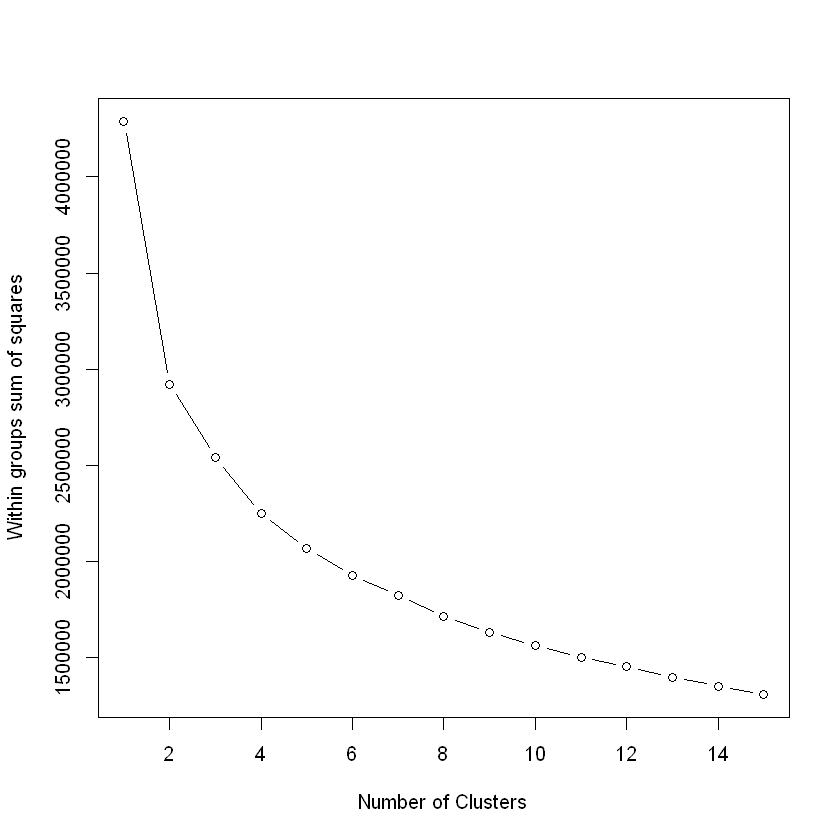

In [17]:
# Initialize total within sum of squares error: wss
wss <- 0

# Look over 1 to 15 possible clusters
for (i in 1:15) {
  # Fit the model: km.out
  km.out <- kmeans(pokemon, centers = i, nstart = 20, iter.max = 50)
  # Save the within cluster sum of squares
  wss[i] <- km.out$tot.withinss
}

# Produce a scree plot
plot(1:15, wss, type = "b", 
     xlab = "Number of Clusters", 
     ylab = "Within groups sum of squares")



In [18]:
# Select number of clusters
k <- 2

# Build model with k clusters: km.out
km.out <- kmeans(pokemon, centers = 2, nstart = 20, iter.max = 50)

# View the resulting model
km.out



K-means clustering with 2 clusters of sizes 374, 426

Cluster means:
  HitPoints   Attack  Defense SpecialAttack SpecialDefense    Speed
1  54.87968 57.94118 55.49733      52.33155       53.44118 54.04278
2  81.88263 97.49061 89.94836      90.80751       88.11033 80.77465

Clustering vector:
  [1] 1 1 2 2 1 1 2 2 2 1 1 2 2 1 1 1 1 1 1 2 1 1 2 2 1 1 1 2 1 2 1 2 1 2 1 1 2
 [38] 1 1 2 1 2 1 2 1 1 1 2 1 1 2 1 1 1 2 1 1 1 1 1 2 1 2 1 2 1 1 2 1 1 2 2 1 1
 [75] 2 1 1 2 1 2 1 1 2 1 2 1 2 2 1 2 1 1 2 1 2 1 2 1 2 1 1 2 2 1 1 2 1 2 1 2 1
[112] 2 1 2 2 2 1 1 2 1 2 1 2 2 2 1 2 1 2 1 2 2 2 2 2 2 2 2 2 1 2 2 2 1 1 2 2 2
[149] 1 1 2 1 2 2 2 2 2 2 2 1 1 2 2 2 2 2 1 1 2 1 1 2 1 1 2 1 1 1 2 1 1 1 1 2 1
[186] 2 1 1 1 1 1 1 2 1 1 2 2 2 1 1 1 2 1 1 2 1 1 2 1 1 2 2 2 1 2 2 1 1 2 1 2 1
[223] 1 2 2 1 2 1 2 2 2 2 2 1 1 2 1 1 1 2 1 1 2 1 2 2 1 2 2 2 1 2 2 2 1 1 2 1 1
[260] 1 2 2 2 2 2 1 1 2 2 2 2 2 1 1 2 2 1 1 2 2 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 2
[297] 1 1 2 1 1 1 2 1 1 2 2 1 1 1 2 1 2 2 1 2 1 1 1 2 1 2 1 1 1 1 1

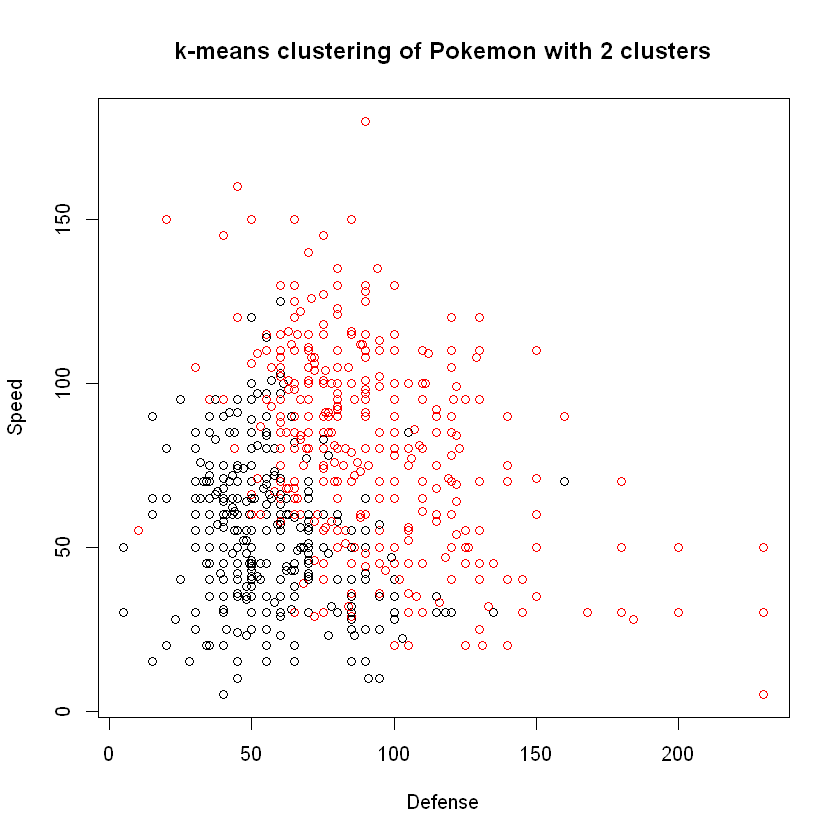

In [19]:
# Plot of Defense vs. Speed by cluster membership
plot(pokemon[, c("Defense", "Speed")],
     col = km.out$cluster,
     main = paste("k-means clustering of Pokemon with", k, "clusters"),
     xlab = "Defense", ylab = "Speed")

## Review of k-means clustering

### Chapter review
- Unsupervised vs. supervised learning
- How to create k-means cluster model in R
- How k-means algorithm works
- Model selection
- Application to "real" (and hopefully fun) dataset


# Hierarchical clustering

Hierarchical clustering is another popular method for clustering. We will go over how it works, how to use it, and how it compares to k-means clustering.



## Introduction to hierarchical clustering

### Hierarchical clustering
- Number of clusters is not known ahead of time
- Two kinds: bottom-up and top-down, we will focus on bottom-up

### Hierarchical clustering in R

In [20]:
dist_matrix <- dist(x)
hclust(dist_matrix)


Call:
hclust(d = dist_matrix)

Cluster method   : complete 
Distance         : euclidean 
Number of objects: 300 


In [21]:
head(x <- as.matrix(x_df <- read_csv("datasets//x2.csv")))

Parsed with column specification:
cols(
  V1 = col_double(),
  V2 = col_double()
)


V1,V2
3.370958,2.321925
1.435302,1.216161
2.363128,3.575728
2.632863,2.642899
2.404268,2.089761
1.893875,2.276551


In [22]:
class(x)

[1] "matrix"

### Hierarchical clustering with results

We will create hierarchical clustering model using the `hclust()` function.

In [23]:
# Create hierarchical clustering model: hclust.out
hclust.out <- hclust(dist(x))

# Inspect the result
summary(hclust.out)

            Length Class  Mode     
merge       98     -none- numeric  
height      49     -none- numeric  
order       50     -none- numeric  
labels       0     -none- NULL     
method       1     -none- character
call         2     -none- call     
dist.method  1     -none- character

## Selecting number of clusters

### Dendrogram
- Tree shaped structure used to interpret hierarchical clustering models

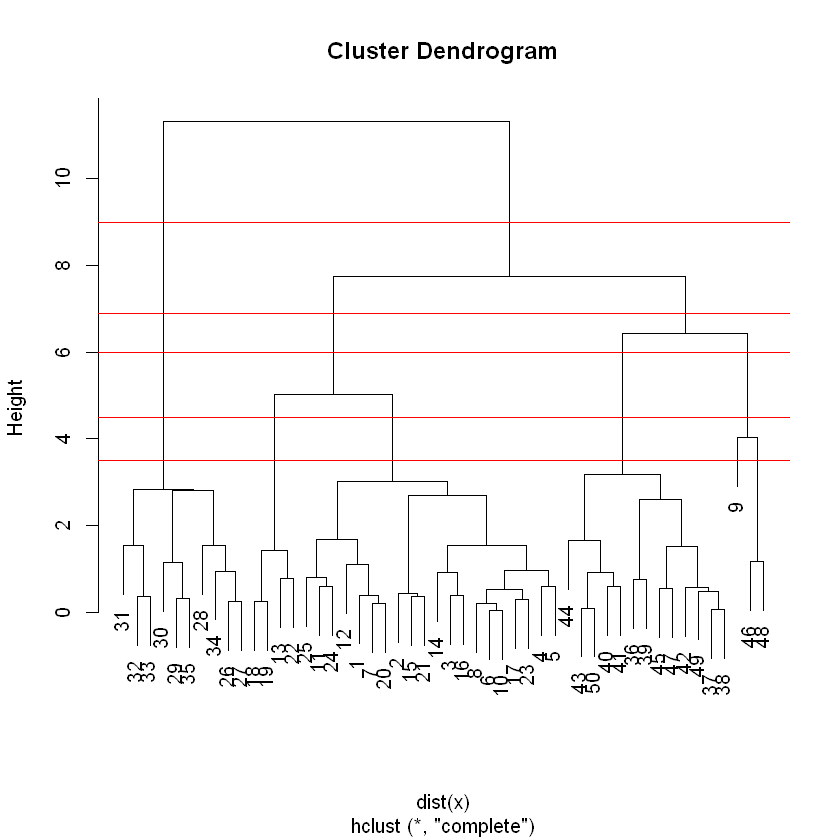

In [28]:
plot(hclust.out)
abline(h=6, col="red")
abline(h=3.5, col="red")
abline(h=4.5, col="red")
abline(h=6.9, col="red")
abline(h=9, col="red")

If you cut the tree at a height of 6.9, you're left with 3 branches representing 3 distinct clusters.

### Tree "cutting" in R

`cutree()` is the R function that cuts a hierarchical model. The `h` and `k` arguments to `cutree()` allow you to cut the tree based on a certain height `h` or a certain number of clusters `k`.

In [26]:
cutree(hclust.out, h=6)

[1] 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3 3 4 4 4
[39] 4 4 4 4 4 4 4 2 4 2 4 4

In [27]:
cutree(hclust.out, k=2)

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 1 1 1
[39] 1 1 1 1 1 1 1 1 1 1 1 1

In [29]:
# Cut by height
cutree(hclust.out, h=7)



[1] 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3 3 2 2 2
[39] 2 2 2 2 2 2 2 2 2 2 2 2

In [30]:
# Cut by number of clusters
cutree(hclust.out, k=3)

[1] 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3 3 2 2 2
[39] 2 2 2 2 2 2 2 2 2 2 2 2

The output of each `cutree()` call represents the cluster assignments for each observation in the original dataset

## Clustering linkage and practical matters

### Linking clusters in hierarchical clustering
- How is distance between clusters determined? Rules?
- Four methods to determine which cluster should be linked
  - **Complete**: pairwise similarity between all observations in cluster 1 and cluster 2, and uses ***largest of similarities***
  - **Single**: same as above but uses ***smallest of similarities***
  - **Average**: same as above but uses ***average of similarities***
  - **Centroid**: finds centroid of cluster 1 and centroid of cluster 2, and uses ***similarity between two centroids***


### Linkage in R

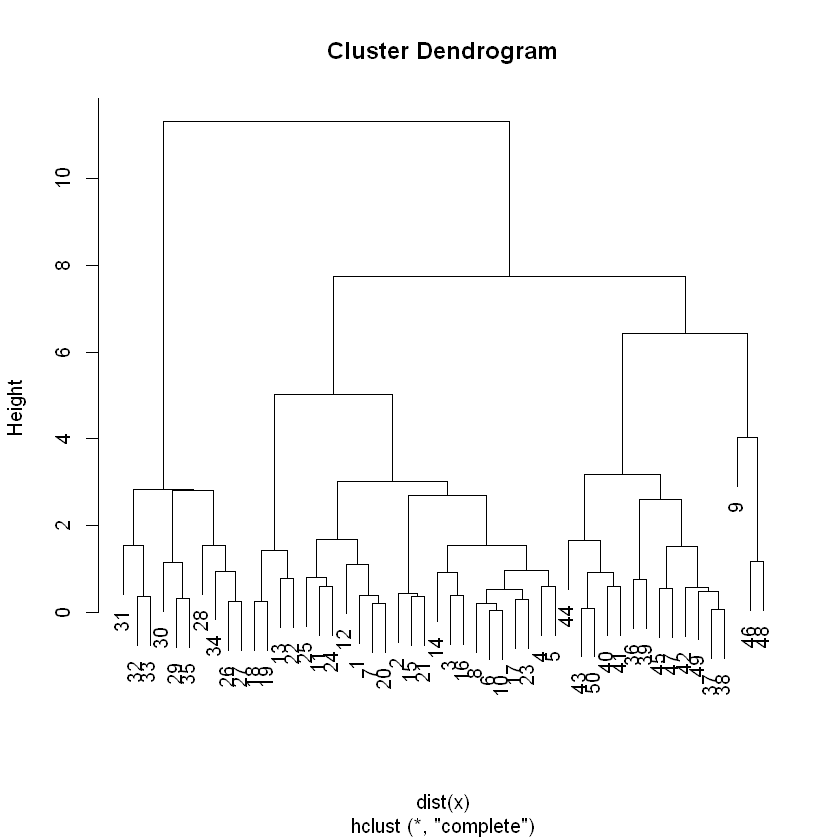

In [34]:
hclust.complete <- hclust(dist(x), method = "complete")
hclust.average <- hclust(dist(x), method = "average")
hclust.single <- hclust(dist(x), method = "single")

plot(hclust.complete)

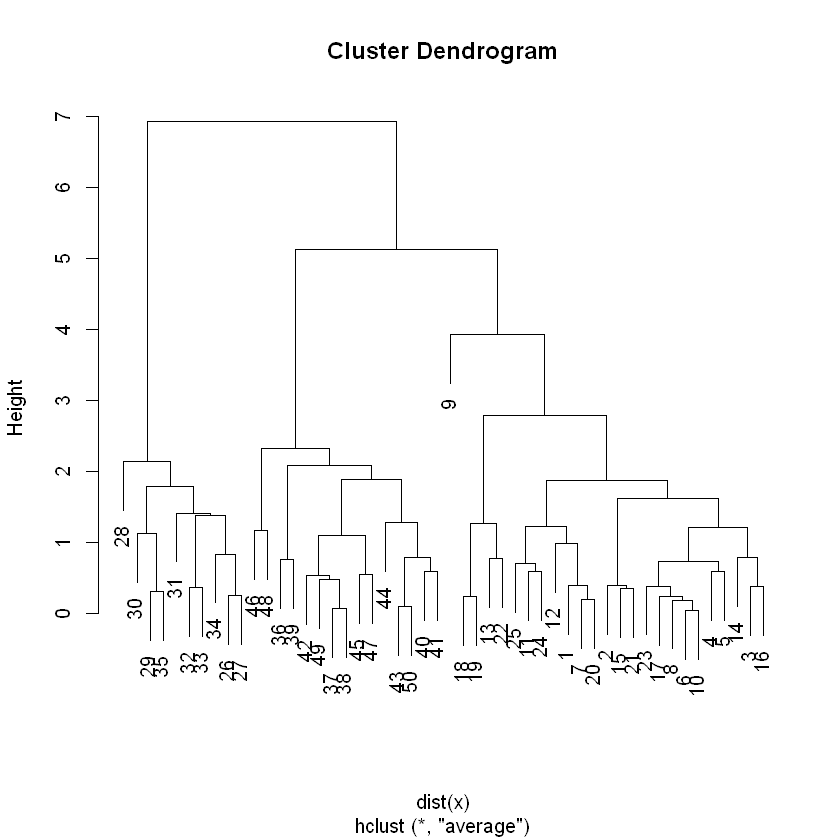

In [35]:
plot(hclust.average)

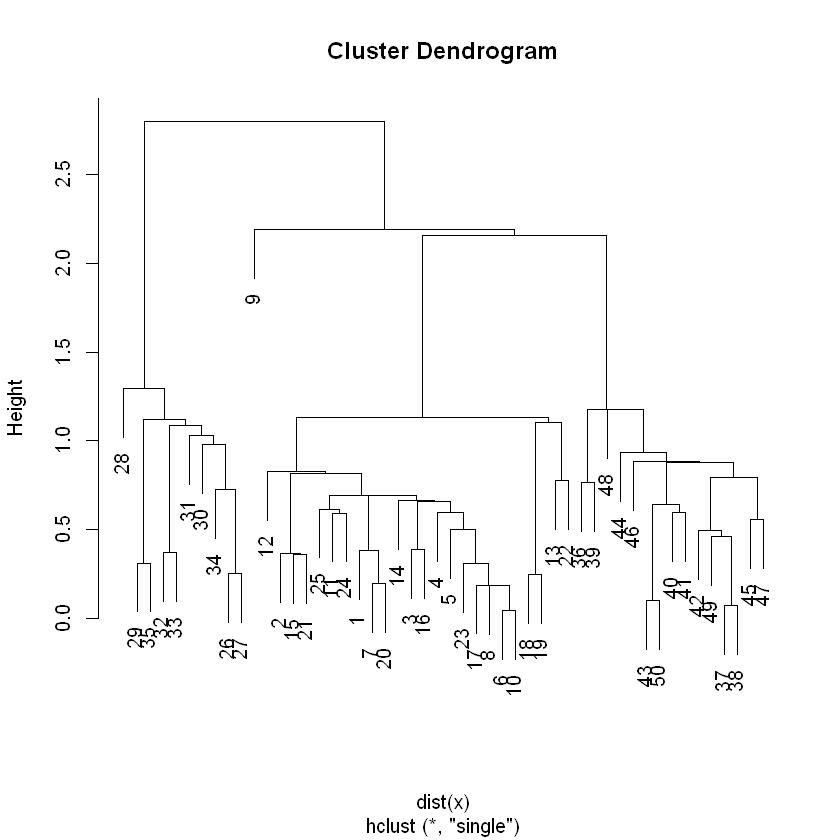

In [36]:
plot(hclust.single)

### Practical matters
- Data on different scales can cause undesirable results in clustering methods
- Solution is to scale data so that features have same mean and standard deviation
  - Subtract mean of a feature from all observations
  - Divide each feature by the standard deviation of the feature
  - Normalized features have a mean of zero and a standard deviation of one


In [37]:
colMeans(x)

V1          V2 
-0.03567178  0.90070141

In [38]:
apply(x, 2, sd)

V1       V2 
2.993586 2.086135

In [39]:
scaled_x <- scale(x)
colMeans(scaled_x)

V1            V2 
-2.289835e-18 -8.673617e-18

In [40]:
apply(scaled_x, 2, sd)

V1 V2 
 1  1